<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#заключение-по-пункту" data-toc-modified-id="заключение-по-пункту-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>заключение по пункту</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#подготовка-датафрейма" data-toc-modified-id="подготовка-датафрейма-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>подготовка датафрейма</a></span></li><li><span><a href="#подготовка-к-использованию-алгоритма" data-toc-modified-id="подготовка-к-использованию-алгоритма-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>подготовка к использованию алгоритма</a></span></li><li><span><a href="#проверка-с-помощью-кросс-валидации" data-toc-modified-id="проверка-с-помощью-кросс-валидации-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>проверка с помощью кросс-валидации</a></span></li><li><span><a href="#Заключение" data-toc-modified-id="Заключение-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Заключение</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

# Исходные данные
- Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
- Целевой признак: количество страховых выплат клиенту за последние 5 лет.

# Cхема выполнения исследования

Инструкция по выполнению проекта
- 1. Загрузите и изучите данные.
- 2. Ответьте на вопрос и обоснуйте решение.

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
- a. Изменится. Приведите примеры матриц.

- b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

- 3. Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.
- 4. Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2

## Загрузка данных

In [1]:
# ячейка импорта
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt  # для построения графиков
import seaborn as sns            # для построения графиков
import warnings                  # добавил чтобы убирать предупреждения

from sklearn.preprocessing import StandardScaler     # для масштабирования
from sklearn.model_selection import train_test_split  # для разбиения на выборки

from sklearn.linear_model import LinearRegression   # модель линейной регрессии
from sklearn.metrics import mean_squared_error      # для расчета MSE
from sklearn.metrics import r2_score                # для расчета R2

from sklearn.model_selection import cross_val_score  # для кросс-валидации
from sklearn.metrics import make_scorer              # импорт make_scorer


pd.options.display.float_format = '{:,.2f}'.format  # форматирование числа разрядов после запятой 

random_state=12345

In [2]:
# открытие файла (на случай если буду открывать вне тренажера, прописал альтернативный путь)
try:
    data = pd.read_csv('/datasets/insurance.csv')
    
except:
    data_path = 'C:/Users/vladk/OneDrive/Рабочий стол/LRN_on_desk/'
    data = pd.read_csv(data_path + 'insurance.csv')

In [3]:
# знакомство с данными
data

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.00,"49,600.00",1,0
1,0,46.00,"38,000.00",1,1
2,0,29.00,"21,000.00",0,0
3,0,21.00,"41,700.00",2,0
4,1,28.00,"26,100.00",0,0
...,...,...,...,...,...
4995,0,28.00,"35,700.00",2,0
4996,0,34.00,"52,400.00",1,0
4997,0,20.00,"33,900.00",2,0
4998,1,22.00,"32,700.00",3,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


пропусков не видно

In [5]:
# посмотрю с помощью describe()
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,"5,000.00","5,000.00","5,000.00","5,000.00","5,000.00"
mean,0.50,30.95,"39,916.36",1.19,0.15
std,0.50,8.44,"9,900.08",1.09,0.46
min,0.00,18.00,"5,300.00",0.00,0.00
25%,0.00,24.00,"33,300.00",0.00,0.00
50%,0.00,30.00,"40,200.00",1.00,0.00
75%,1.00,37.00,"46,600.00",2.00,0.00
max,1.00,65.00,"79,000.00",6.00,5.00


In [6]:
# посмотрю на наличие дубликатов
data.duplicated().sum()

153

In [7]:
# посмотрю на скоррелированность признаков
data.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.00,0.00,0.01,-0.01,0.01
Возраст,0.00,1.00,-0.02,-0.01,0.65
Зарплата,0.01,-0.02,1.00,-0.03,-0.01
Члены семьи,-0.01,-0.01,-0.03,1.00,-0.04
Страховые выплаты,0.01,0.65,-0.01,-0.04,1.00


видна некоторая (не очень сильная) корреляция между возрастом и числом выплат

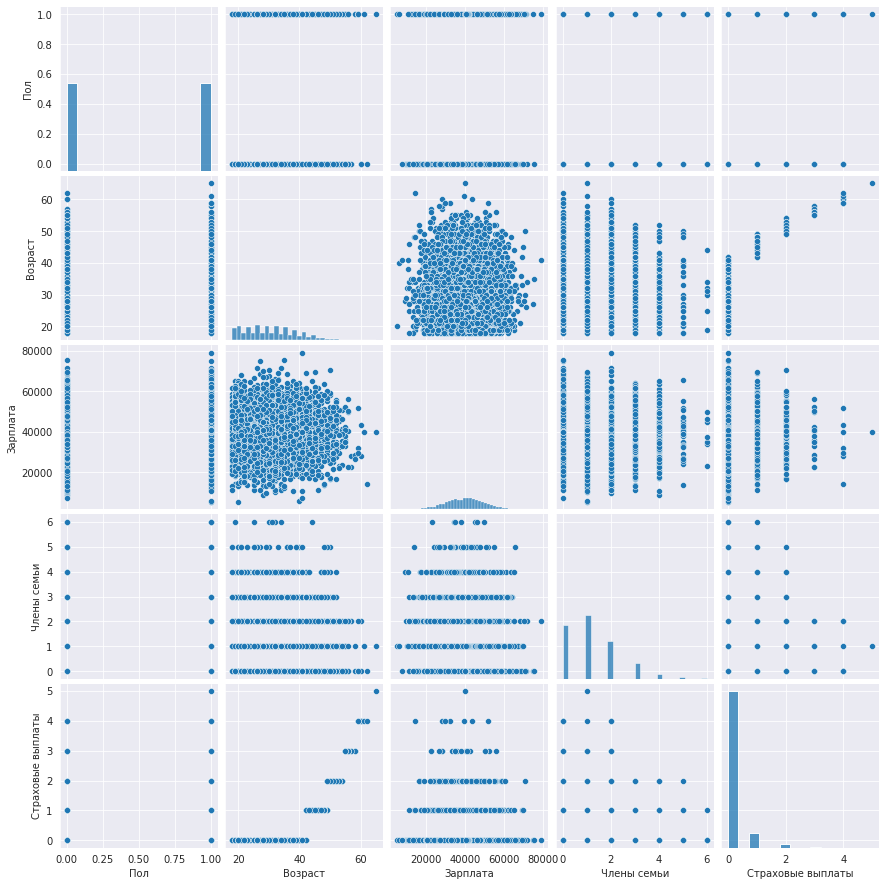

In [8]:
# выведу pairplot

sns.set_style("darkgrid")
sns.pairplot(data)

похоже что зарплаты распределяются нормально, некоторая корреляция возраста и числа выплат видна на графике - чем больше возраст там больше выплат (причем выплаты характерны только для людей старше 40 лет)

<AxesSubplot:>

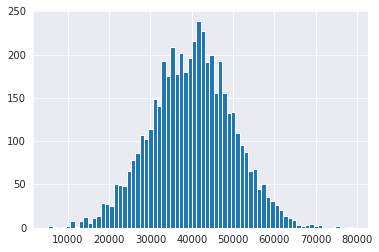

In [9]:
# посмотрю лучше на распределение зарплаты
data['Зарплата'].hist(bins=70)

In [10]:
# удалю дубликаты
data = data.drop_duplicates()

In [11]:
# переведу названия столбцов в змеиный регистр (так исходно говорили, что надо делать)
data.columns = ['gender', 'age', 'salary', 'familiars', 'benefits']

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     4847 non-null   int64  
 1   age        4847 non-null   float64
 2   salary     4847 non-null   float64
 3   familiars  4847 non-null   int64  
 4   benefits   4847 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 227.2 KB


### заключение по пункту

В итоге после загрузки и небольшой предобработки сделано (или отмечено следующие):
- пропусков нет, дубликаты удалены
- столбцы переименованы
- признак возраст имеет некоторую корреляцию с целевым признаком (количество страховых выплат)
- пол, члены семьи и целевой признак (количество страховых выплат) представлены категориальными данными, возраст и зарплата - количественные (причем разного масштаба)

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$



**Обоснование:**

1. Пишу формулу обучения с подстановкой матрицы, на которую умножаются признаки:

$$
w = ((X P)^T(X P))^{-1}(X P)^Ty
$$

2. Далее исхожу из свойств транспонирования матриц, где $(A B)^T = B^T A^T$

$$
w = (P^T X^T X P)^{-1}P^TX^Ty
$$

3. Далее исхожу из свойств обратных матриц, где $(A B)^{-1} = B^{-1} A^{-1}$, помня про то что $(X^TX)$ должны оставаться под знаком обратной матрицы всегда вместе

$$
w = P^{-1} (P^T X^T X)^{-1}P^TX^Ty
$$

$$
w = P^{-1}(X^T X)^{-1}(P^T)^{-1}P^TX^Ty
$$

4. На этом этапе $P^T$ и $P^T{-1}$ дадут единичную матрицу и формула станет принимать такой вид:

$$
w = P^{-1}(X^T X)^{-1}E X^Ty
$$

$$
w = P^{-1}(X^T X)^{-1}X^Ty
$$

5. при умножении на единичную матрицу получится та же матрица, в итоге в формуле прдескахания это будет выглядет так:

$$
a =  X P P^{-1}(X^T X)^{-1} X^T
$$

6. $P$ и $P^{-1}$ тоже дадут единичную матрицу и сократятся и в итоге формула прдесказаний не изменится

$$
a =  X E (X^T X)^{-1} X^T
$$

$$
a = X (X^T X)^{-1} X^T
$$

здесь мне показался важным пункт в задании, что регрессию после умножения признаков на обратимую матрицу можно обучить заново (скорее нужно), т.к. если делать предсказания по признакам умноженным на обратмую матрицу, но регрессия будет обучена на исходных данных - результат будет ошибочным (тогда эффект "сокращения" P не проявится)

в общем пункт является ключевым и занял больше всего времени - основной вопрос для меня был в раскрытии скобок при операциях с матрицами (нашел указанные выше свойства транспонированных и обратных матриц - надеюсь что такой подход - корректен) 

## Алгоритм преобразования

**Алгоритм**

1. Мне кажется само содержание задания наводит на ответ, что данные надо будет умножить на единичную матрицу

2. Перед этим, хочу еще провести масштабирование 

**Обоснование**

1. Процесс, который реализуется в пункте 2 демонстрирует, что умножение данных на квадратную матрицу (ширина, которой будет сходна с шириной датафрэйма) видоизменит весь датафрейм, но после обучения регресии и получения предсказаний - предсказания будут такими же, как и для не видоизмененных данных (важно заново обучить регрессию на модифицированных данных). 

2. Масштабирование тоже видоизменит данные от исходных, кроме того количественные данные по возрасту и зарплате различаются на порядки.

## Проверка алгоритма

### подготовка датафрейма

In [13]:
# выделю набор признаков и целевой признак

features = data.drop(['benefits'], axis=1)
target = data['benefits']

In [14]:
# масштабирование
scaler = StandardScaler()

scaler.fit(features)           
features_scaled = scaler.transform(features)

### подготовка к использованию алгоритма

In [15]:
# генерация квадратной матрицы (размером 4 на 4, чтобы умножить ее на датасет)
matrix = np.random.normal(4, 2, size=(4, 4))
matrix

array([[ 4.06352749,  0.79211247, -0.72486272,  4.461457  ],
       [ 5.92674939,  0.70792329,  2.15360095,  0.78818953],
       [ 1.7031875 ,  3.28615524,  3.42324812,  2.12231836],
       [ 2.05504964,  2.23749513,  3.65119362,  0.67978733]])

In [16]:
# проверка этой матрицы на обратимость
matrix_inv = np.linalg.inv(matrix)
matrix_inv

array([[-0.13365795,  0.35411204,  0.32137026, -0.53670937],
       [-0.69212492,  0.74876648,  1.94707549, -2.40457318],
       [ 0.39999601, -0.55652791, -1.21835861,  1.82384879],
       [ 0.53375068, -0.5458884 , -0.83635063,  1.21208512]])

In [17]:
# умножаю матрицу с исходными (уже масштабированными данными) на квадратную обратимую
features_modified = features_scaled.dot(matrix)

In [18]:
# посмотрю на результат
features_modified

array([[ 12.31955152,   4.41028167,   4.45953599,   7.34120781],
       [  5.70281192,  -0.57956558,   3.19586741,  -3.58622486],
       [-10.94293873,  -9.63652335, -10.277424  ,  -9.40189918],
       ...,
       [-11.28316244,  -2.06261073,  -1.48545177,  -6.25461288],
       [ -0.09368872,   1.32976639,   0.48401492,   3.21749037],
       [  1.70417037,   0.36006596,  -1.92880265,   4.21844785]])

In [19]:
# инициация модели
linear = LinearRegression()

### проверка с помощью кросс-валидации

In [20]:
# делаю scorer по r2_score, чтобы использовать в кросс-валидации
r2 = make_scorer(r2_score, greater_is_better=True)

In [21]:
# кросс-валидация по исходным данным 
scores = cross_val_score(linear, features_scaled, target, scoring=r2, cv=10)   # кросс-валидация
final_score = scores.mean()                                                  # cредняя оценка качества модели
print(scores)
print('Средняя оценка качества модели по R2 на исходных данных:', final_score)

[0.43732736 0.32590498 0.47465875 0.41955112 0.44235782 0.39259707
 0.44016863 0.36839904 0.43926976 0.45421724]
Средняя оценка качества модели по R2 на исходных данных: 0.419445178191361


In [22]:
# кросс-валидация по модифицированным данным 
scores = cross_val_score(linear, features_modified, target, scoring=r2, cv=10)   # кросс-валидация
final_score = scores.mean()                                                  # cредняя оценка качества модели
print(scores)
print('Средняя оценка качества модели по R2 на данных умноженных на квадратную матрицу:', final_score)

[0.43732736 0.32590498 0.47465875 0.41955112 0.44235782 0.39259707
 0.44016863 0.36839904 0.43926976 0.45421724]
Средняя оценка качества модели по R2 на данных умноженных на квадратную матрицу: 0.419445178191361


результаты - одинаковые

### Заключение


1. после загрузки и небольшой предобработки сделано (или отмечено следующие):
- пропусков нет, дубликаты удалены
- столбцы переименованы
- признак возраст имеет некоторую корреляцию с целевым признаком (количество страховых выплат)
- пол, члены семьи и целевой признак (количество страховых выплат) представлены категориальными данными, возраст и зарплата - количественные (причем разного масштаба)   

2. качество линейной регресии после умнжения исходных признаков на квадратную матрицу не изменится, т.к. при подстановке в формулы обучения и затем предсказания квадратная матрица скоратится   

3. Для преобразования данных по страховкам можно использовать как раз умножение на единичную матрицу (перед этим я еще сделал масштабирование признаков)  

4. R2_score при кросс-валидации на обоих вариантах данных (до умножения на квадратную матрицу и после) был одинаковым - 0.42 